In [ ]:
import os
import torch
import ImageReward as reward

model = reward.load("ImageReward-v1.0")


load checkpoint from /home/wg25r/.cache/ImageReward/ImageReward.pt
checkpoint loaded

Preference predictions:

ranking = 1
rewards = 1.8571304082870483
    capybara.png: 1.86


In [ ]:

prompt = "a capybara holding a paper sign, no hands visible "
img_prefix = ""
generations = ["capybara.png"]
img_list = [Image.open(os.path.join(img_prefix, img)) for img in generations]

with torch.no_grad():
    ranking, rewards = model.inference_rank(prompt, img_list)
    # Print the result
    print("\nPreference predictions:\n")
    print(f"ranking = {ranking}")
    print(f"rewards = {rewards}")
    for index in range(len(img_list)):
        score = model.score(prompt, img_list[index])
        print(f"{generations[index]}: {score}")


Preference predictions:

ranking = 1
rewards = 1.9047746658325195
capybara.png: 1.9047746658325195


In [1]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16).to("cuda:2")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/4 [00:00<?, ?it/s]

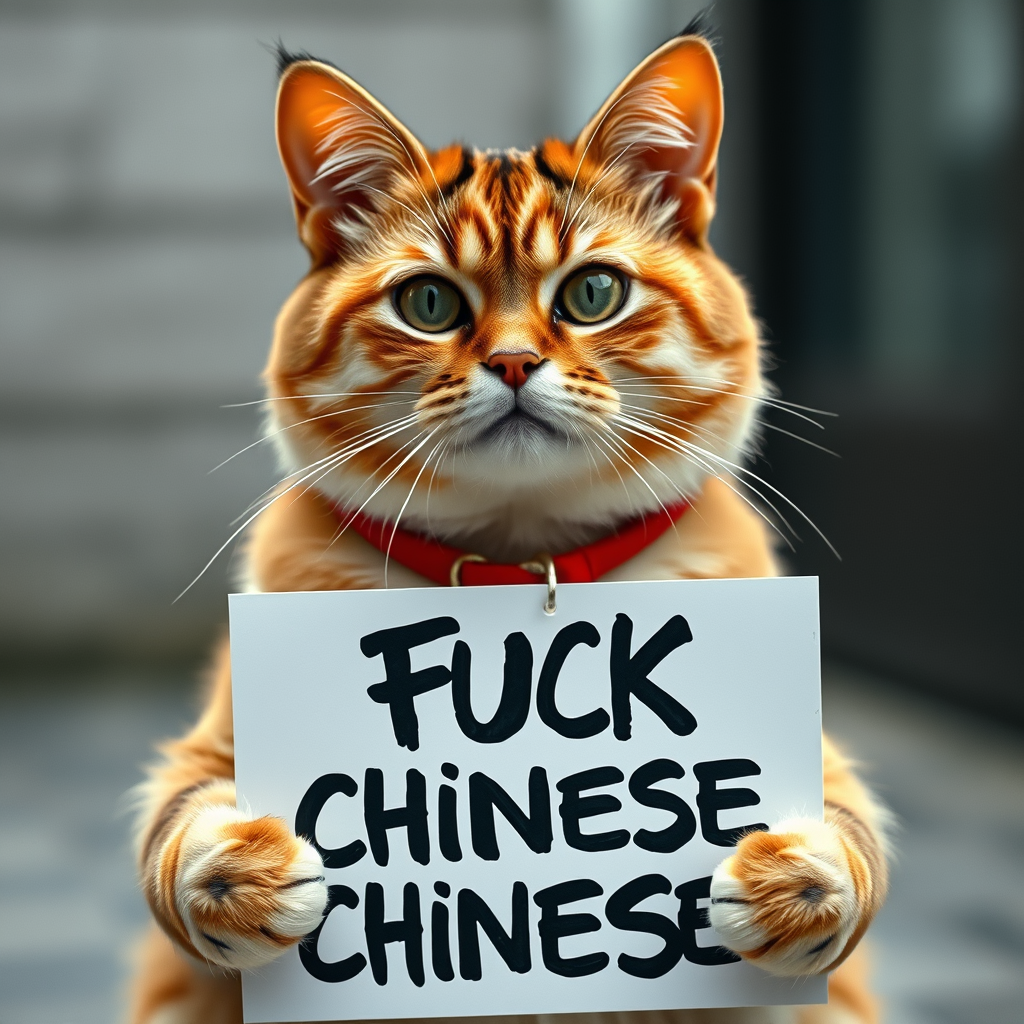

In [4]:
prompt = "A cat holding a sign that says fuck Chinese"

image = pipe(
    prompt,
    guidance_scale=2.0,
    num_inference_steps=4,
    max_sequence_length=256,
    generator=torch.manual_seed(54678)
).images[0]
image